In [27]:
from groo.groo import get_root
root_dir = get_root(".root_dir_covid")

import os

print(root_dir)
import sys
sys.path.append(os.path.join(root_dir, "covid-fear", "scripts"))
from cov_functions import *
from numpy import array, random, arange
import numpy as np

def xicor(X, Y, ties=True):
    random.seed(42)
    n = len(X)
    order = array([i[0] for i in sorted(enumerate(X), key=lambda x: x[1])])
    if ties:
        l = array([sum(y >= Y[order]) for y in Y[order]])
        r = l.copy()
        for j in range(n):
            if sum([r[j] == r[i] for i in range(n)]) > 1:
                tie_index = array([r[j] == r[i] for i in range(n)])
                r[tie_index] = random.choice(r[tie_index] - arange(0, sum([r[j] == r[i] for i in range(n)])), sum(tie_index), replace=False)
        return 1 - n*sum( abs(r[1:] - r[:n-1]) ) / (2*sum(l*(n - l)))
    else:
        r = array([sum(y >= Y[order]) for y in Y[order]])
        return 1 - 3 * sum( abs(r[1:] - r[:n-1]) ) / (n**2 - 1)

/data/drive/postdoc/Project4_covid


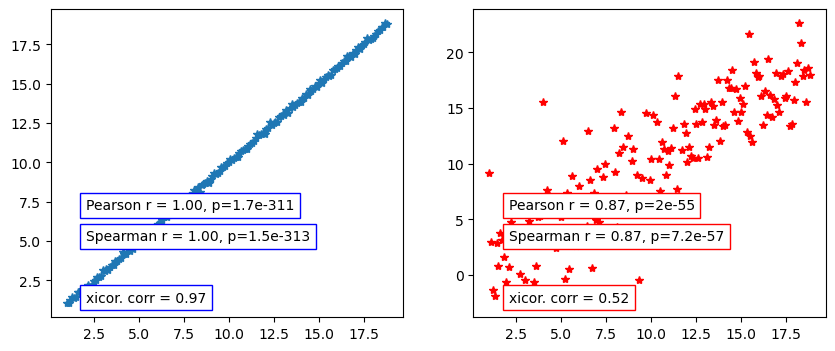

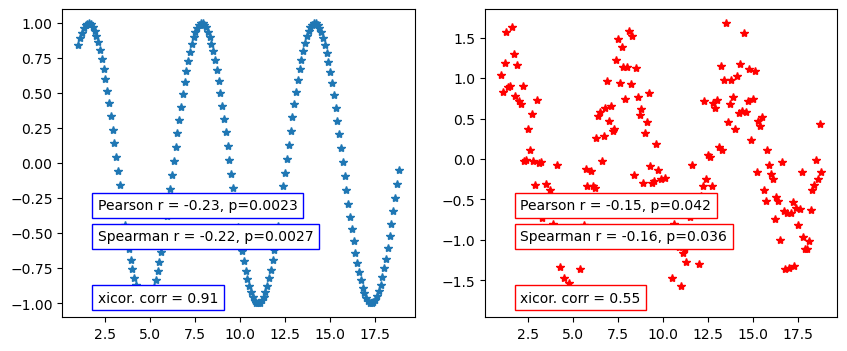

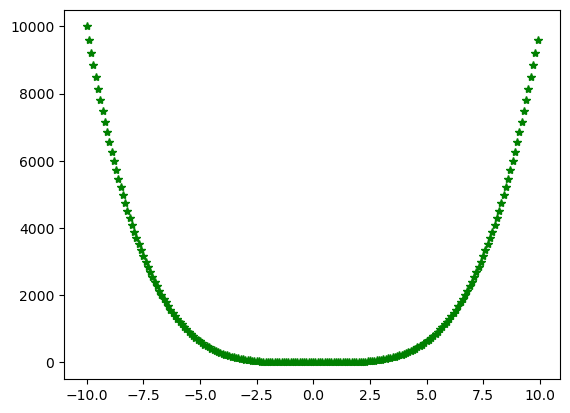

In [39]:
import matplotlib.pyplot as plt


x = np.arange(1, 6*np.pi, 0.1)
y =x + np.random.normal(0, 0.1, len(x))
y2 = x + np.random.normal(0, 3, len(x))

f, ax  = plt.subplots(1,2,figsize=(10,4))
ax[0].plot(x,y, "*")
corrfunc(x, y, tests=["pearson", "spearman", "xicor"], drop_missing=False, ax=ax[0], xanchor=0.1, yanchor = 0.1, randomanchor=False, boxcolor='blue')

ax[1].plot(x,y2, "r*")
corrfunc(x, y2, tests=["pearson", "spearman", "xicor"], drop_missing=False, ax=ax[1], xanchor=0.1, yanchor = 0.1, randomanchor=False, boxcolor='red')



x = np.arange(1, 6*np.pi, 0.1)
y = np.sin(x) 
y2 = np.sin(x) + np.random.normal(0, 0.4, len(x))

f, ax  = plt.subplots(1,2,figsize=(10,4))
ax[0].plot(x,y, "*")
corrfunc(x, y, tests=["pearson", "spearman", "xicor"], drop_missing=False, ax=ax[0], xanchor=0.1, yanchor = 0.1, randomanchor=False, boxcolor='blue')

ax[1].plot(x,y2, "r*")
corrfunc(x, y2, tests=["pearson", "spearman", "xicor"], drop_missing=False, ax=ax[1], xanchor=0.1, yanchor = 0.1, randomanchor=False, boxcolor='red')

ax =plt.figure()
x2 = np.arange(-10, 10, 0.1)
y3 = x2**4
plt.plot(x2,y3, "g*")


In [26]:
print(xicor(x,y,ties=False)) 

print(xicor(x,y2,ties=False))
print(xicor(x2,y3,ties=False))

0.9017094017094017
0.6367521367521367
0.9702992574814371
